<a href="https://colab.research.google.com/github/Sunny1729-prog/Data-Science-and-Machine-Learning/blob/main/%24_Assignment5(DS%26ML)(Name%3DSunny_Kumar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

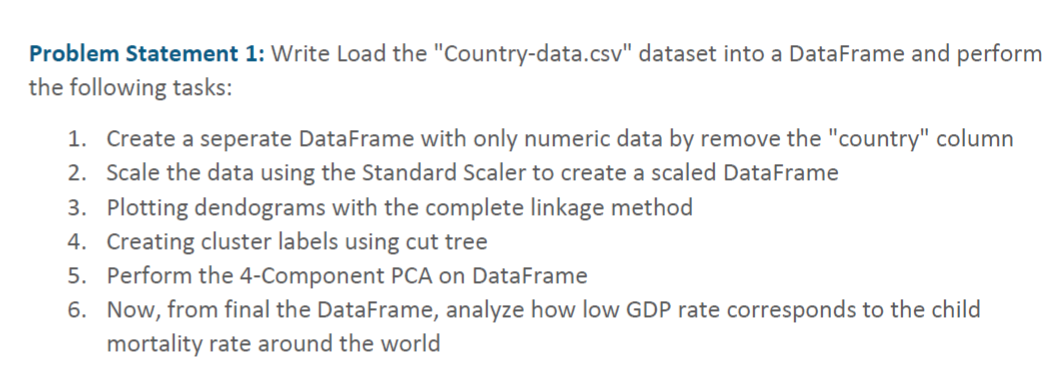

In [2]:
df=pd.read_csv("/content/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.drop(columns=["country"],inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(df)
df_scaled=pd.DataFrame(array,columns=df.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


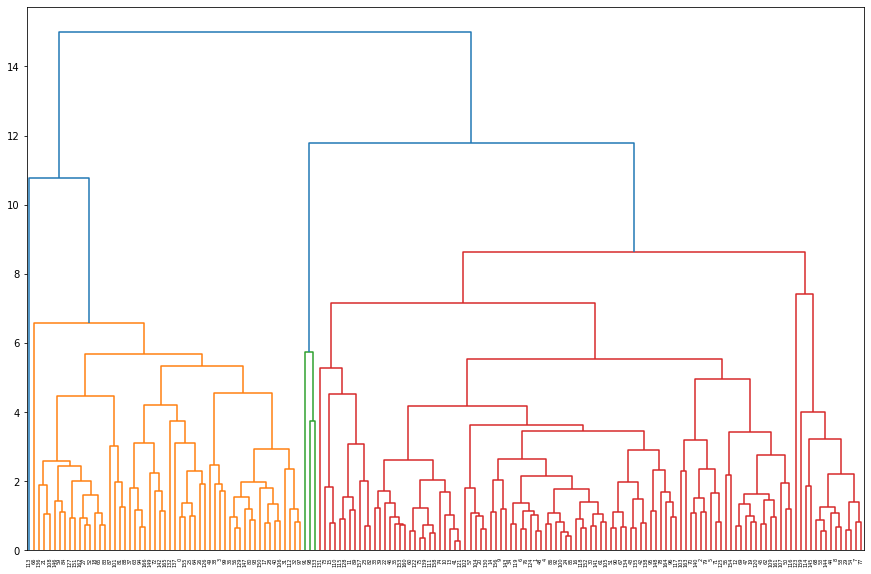

In [6]:
from scipy.cluster.hierarchy import dendrogram,linkage
link=linkage(df_scaled,method='complete')
plt.figure(figsize=(15,10))
dendrogram(link)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,linkage='complete')
cluster.fit(df_scaled)
cluster.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [8]:
df_scaled["Hierarchical_Cluster_labels"]=cluster.labels_
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
array2 = pca.fit_transform(df_scaled.iloc[:,:-1])
df_pca=pd.DataFrame(array2,columns=["PC1","PC2","PC3","PC4"])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [10]:
df_pca["Hierarchical_Cluster_labels"]=df_scaled["Hierarchical_Cluster_labels"]
df_pca

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,1
1,0.429911,-0.588156,-0.333486,-1.161059,0
2,-0.285225,-0.455174,1.221505,-0.868115,0
3,-2.932423,1.695555,1.525044,0.839625,1
4,1.033576,0.136659,-0.225721,-0.847063,0
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,1
163,-0.551036,-1.233886,3.101350,-0.115311,0
164,0.498524,1.390744,-0.238526,-1.074098,0
165,-1.887451,-0.109453,1.109752,0.056257,1


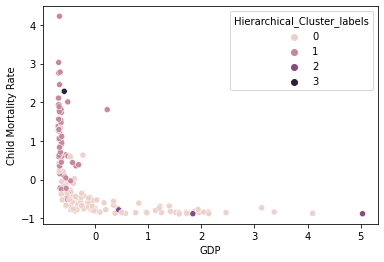

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("GDP")
plt.ylabel("Child Mortality Rate")
sns.scatterplot(x='gdpp',y='child_mort',hue="Hierarchical_Cluster_labels",data=df_scaled)

##Problem 2 is a copy of Problem 1

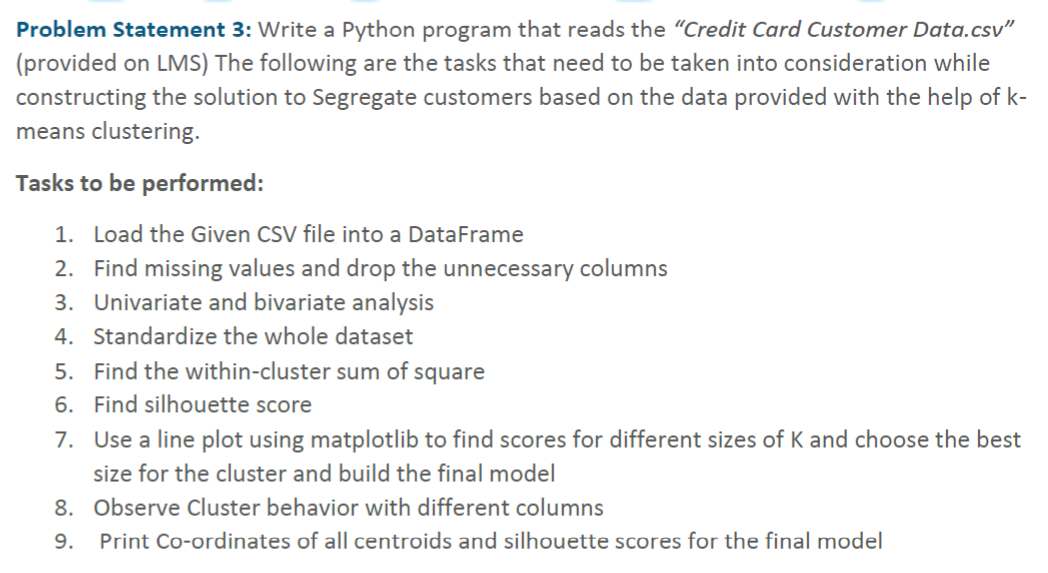

In [12]:
df2=pd.read_csv("/content/Credit Card Customer Data.csv")
df2

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [13]:
df2.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [14]:
df2.drop(columns=["Sl_No","Customer Key"],inplace=True)
df2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [15]:
X=df2.values

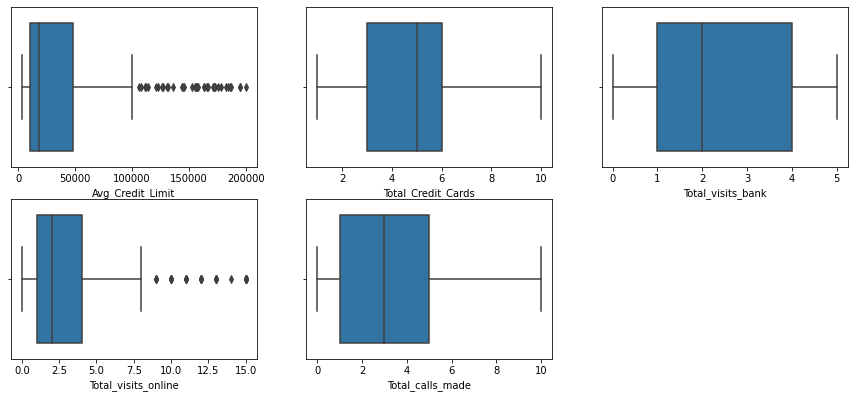

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x="Avg_Credit_Limit",data=df2)
plt.subplot(3,3,2)
sns.boxplot(x="Total_Credit_Cards",data=df2)
plt.subplot(3,3,3)
sns.boxplot(x="Total_visits_bank",data=df2)
plt.subplot(3,3,4)
sns.boxplot(x="Total_visits_online",data=df2)
plt.subplot(3,3,5)
sns.boxplot(x="Total_calls_made",data=df2)

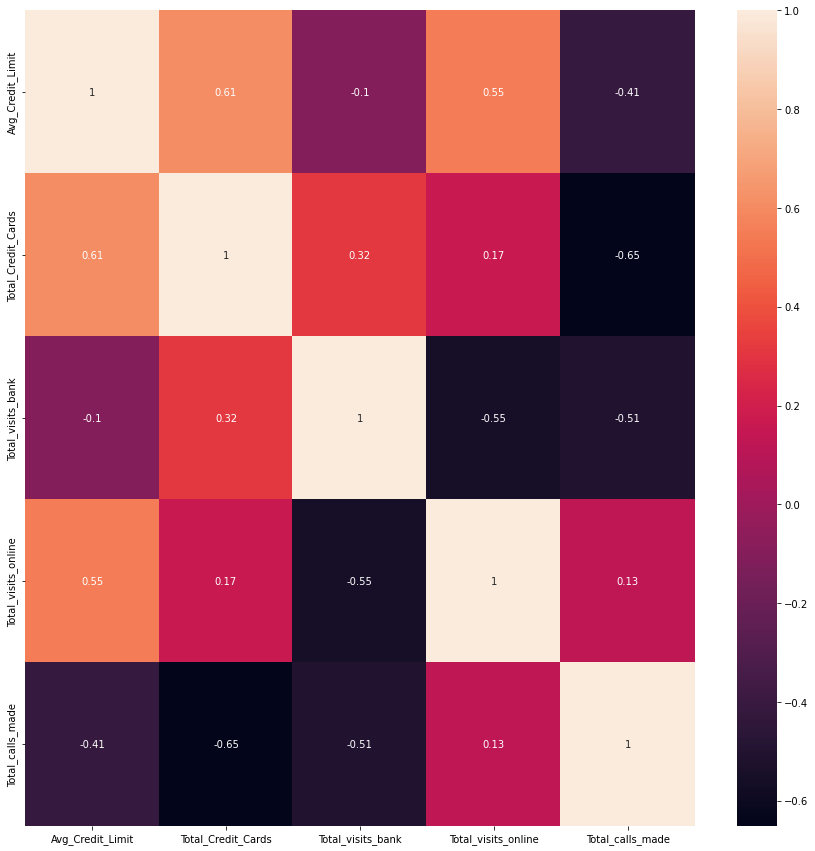

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot = True)

In [18]:
df2_std=(df2-df2.mean())/df2.std()
df2_std

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.738868,-1.248278,-0.859799,-0.547075,-1.250589
1,0.409982,-0.786988,-1.472614,2.518608,1.890425
2,0.409982,1.058171,-0.859799,0.134188,0.145417
3,-0.121573,0.135591,-0.859799,-0.547075,0.145417
4,1.738868,0.596881,-1.472614,3.199871,-0.203584
...,...,...,...,...,...
655,1.712290,2.442040,-0.859799,2.518608,-1.250589
656,1.313624,2.442040,-0.859799,3.540503,-0.552586
657,2.934866,1.519460,-0.859799,2.177977,-0.901587
658,3.652464,2.442040,-0.859799,4.221766,-1.250589


In [42]:
inertia = []
for i in range(2,15):
  km = KMeans(n_clusters=i)
  km.fit(df2_std)
  inertia.append(km.inertia_)
print(inertia)

[2037.897407665649, 931.6300463500535, 779.5906991164572, 703.6875814758939, 641.1955726062951, 599.2163454050217, 563.8550499756759, 542.6320352263822, 509.8334095210434, 486.87051976219027, 465.04145050202374, 445.73166759146454, 430.40285420977835]


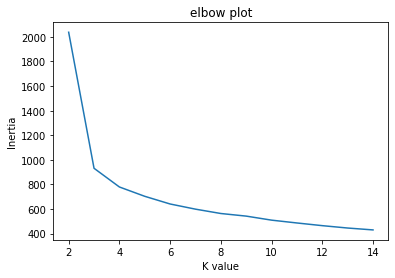

In [43]:
plt.plot(range(2,15), inertia)
plt.xlabel("K value")
plt.ylabel("Inertia")
plt.title("elbow plot")
plt.show()

In [44]:
  km = KMeans(n_clusters=3)
  km.fit(df2_std)

KMeans(n_clusters=3)

In [46]:
df2_std['cluster'] = km.labels_
df2_std

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1.738868,-1.248278,-0.859799,-0.547075,-1.250589,0
1,0.409982,-0.786988,-1.472614,2.518608,1.890425,1
2,0.409982,1.058171,-0.859799,0.134188,0.145417,0
3,-0.121573,0.135591,-0.859799,-0.547075,0.145417,0
4,1.738868,0.596881,-1.472614,3.199871,-0.203584,2
...,...,...,...,...,...,...
655,1.712290,2.442040,-0.859799,2.518608,-1.250589,2
656,1.313624,2.442040,-0.859799,3.540503,-0.552586,2
657,2.934866,1.519460,-0.859799,2.177977,-0.901587,2
658,3.652464,2.442040,-0.859799,4.221766,-1.250589,2


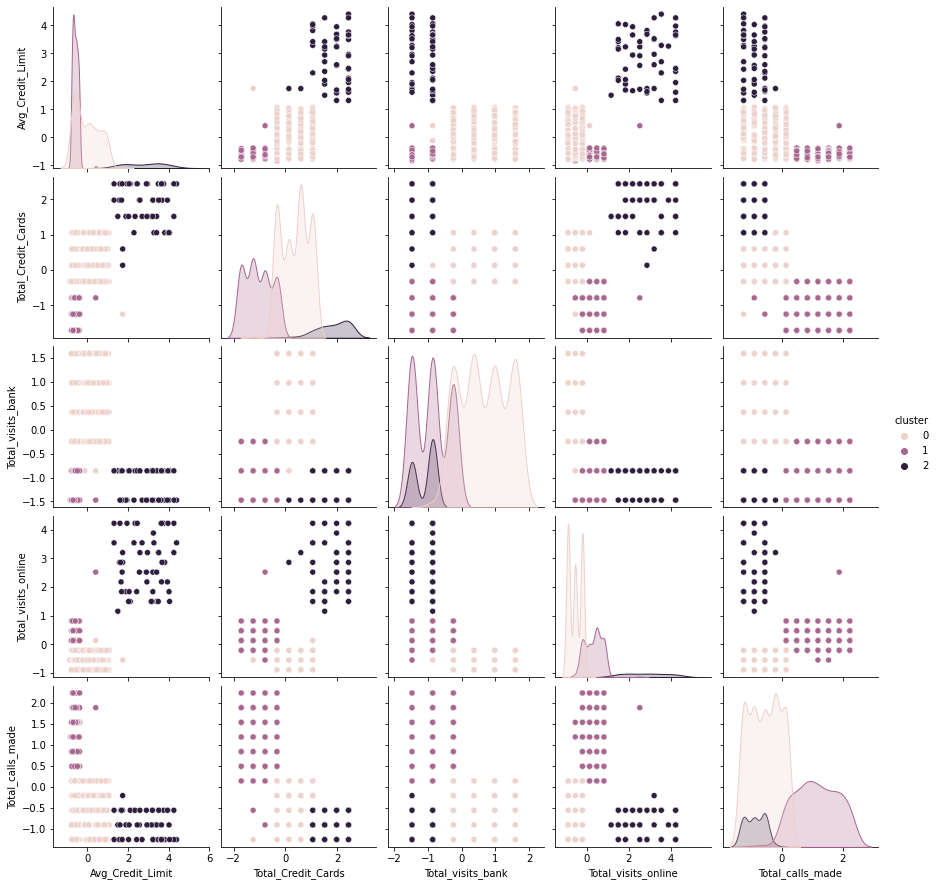

In [49]:
sns.pairplot(df2_std, hue="cluster")

In [45]:
km.cluster_centers_

array([[-0.02104581,  0.37340641,  0.66588946, -0.55325203, -0.55258578],
       [-0.59534471, -1.05881973, -0.90083527,  0.322752  ,  1.14723871],
       [ 2.829618  ,  1.86081489, -1.10492467,  2.8251767 , -0.8736672 ]])

In [51]:
labels=km.labels_

In [52]:
km.inertia_  #within cluster sum of squares

931.6300463500535

In [54]:
X=df2_std.iloc[:,:-1]

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.5157182558881688

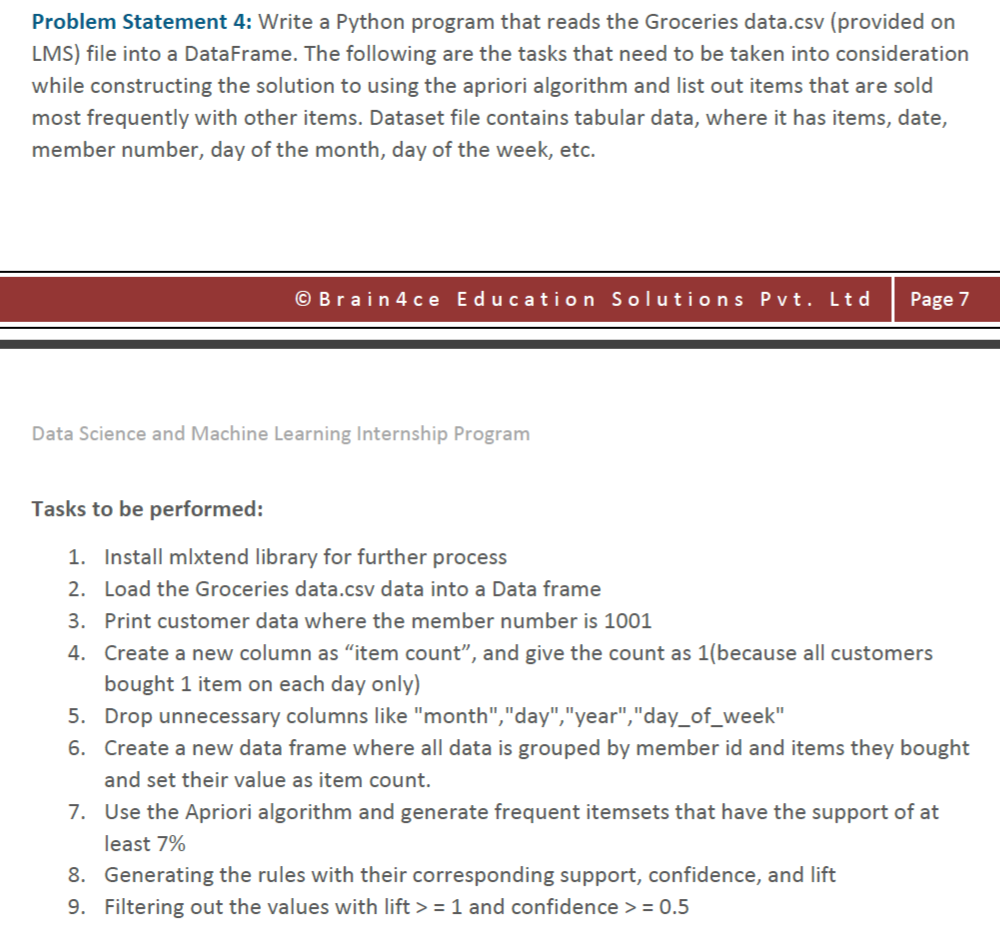

In [28]:
df=pd.read_csv("/content/Groceries data.csv")
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [29]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [30]:
df[df["Member_number"] == 1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [31]:
df["item count"]=1

In [32]:
df.drop(columns=["month", "day","year","day_of_week"], inplace=True)

In [33]:
df

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


In [34]:
df2=df.groupby(["Member_number","itemDescription"])["item count"].sum().unstack().reset_index().set_index("Member_number").fillna(0)
df2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
def fxn(a) :
  if a <= 0 :
    return 0
  if a>= 0 :
    return 1

df2=df2.applymap(fxn)
df2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
frequent_itemsets = apriori(df2, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whole milk, whipped/sour cream)"
80,0.150590,"(whole milk, yogurt)"
81,0.082093,"(whole milk, rolls/buns, other vegetables)"


In [37]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1.1)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727
67,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
69,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235
68,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
49,(sausage),(yogurt),0.206003,0.282966,0.075423,0.366127,1.293892,0.017132,1.131196
...,...,...,...,...,...,...,...,...,...
10,(citrus fruit),(other vegetables),0.185480,0.376603,0.077476,0.417704,1.109135,0.007623,1.070584
27,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
26,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
13,(rolls/buns),(citrus fruit),0.349666,0.185480,0.071832,0.205429,1.107556,0.006976,1.025107


In [38]:
rules[(rules["lift"] >= 1) & (rules["confidence"] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
7,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
9,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
14,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
17,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
27,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
31,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572
33,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239
39,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
47,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
